# Import libraries 



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Import Datasets

In [2]:
# Loading Train Data
df_train = pd.read_csv("CE802_P2_Data.csv")
# Loading Train Data
df_test = pd.read_csv("CE802_P2_Test.csv")

# Exploratory data analysis

In [3]:
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True


In [4]:
df_train.shape

(1500, 16)

In [5]:
df_train.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Class'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   int64  
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


# Data Preprocessing

In [7]:
# drping entire row that has nan value
df_train.dropna(subset=['F15'], axis=0,inplace= True)
df_test.dropna(subset=['F15'], axis=0,inplace= True)

In [8]:
df_train.shape

(750, 16)

# Spliting our dataset into Training and Validation sets

In [9]:
# Set variables for the targets and features
X = df_train.drop('Class', axis=1)
y = df_train['Class']

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=7)

# Decision Tree Classifier

In [10]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
# instantiate the DecisionTreeClassifier model
clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_dt.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [12]:
# Predict classes given the validation features
pred_y = clf_dt.predict(val_X)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(val_y, pred_y)
accuracy_scores = []
accuracy_scores.append(accuracy)
print("Accuracy: ", accuracy)

Accuracy:  0.86


# Random Forest Classifier

In [13]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Create the Random forest classifier and fit it to our training data
cld_rf = RandomForestClassifier(random_state=7, n_estimators=100)

cld_rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [15]:
# Predict classes given the validation features
pred_y = cld_rf.predict(val_X)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(val_y, pred_y)
accuracy_scores.append(accuracy)
print("Accuracy: ", accuracy)

Accuracy:  0.8866666666666667


# Logistic Regression Classifier

In [16]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

#### Feature Scaling

In [17]:
# data scaling with sklearn
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scal = StandardScaler().fit(train_X)

# transform training data
X_train_scal = scal.transform(train_X)

# transform validation dataabs
X_val_scal = scal.transform(val_X)

In [18]:
# Create the LogisticRegression classifier and fit it to our training data
cld_lr = LogisticRegression()

cld_lr.fit(X_train_scal, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Predict classes given the validation features
pred_y = cld_lr.predict(X_val_scal)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(val_y, pred_y)
accuracy_scores.append(accuracy)
print("Accuracy: ", accuracy)

Accuracy:  0.9133333333333333


# Models Score Plot

In [20]:
import numpy as np
import matplotlib.pyplot as plt

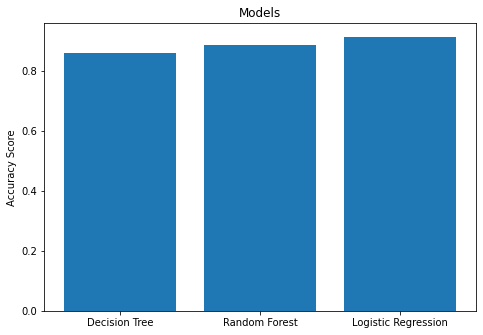

In [21]:
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,accuracy_scores)
ax.set_ylabel('Accuracy Score')
ax.set_title('Models')
plt.show()

# Prediction on Test Dataset

### Selecting Logistic Regression model, because it has 91% accuracy

In [22]:
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
1,3,196.88,-31.74,-31.54,1.48,368.22,-0.90,-6.35,-12.63,1.64,-18.34,7.89,-3.77,10,8.81,NaN
4,3,218.88,-33.51,-33.38,0.68,263.22,1.41,-6.80,-22.26,1.01,-22.90,7.89,-3.56,106,7.28,NaN
7,30,26.88,-24.09,-17.44,14.20,398.22,-4.38,-2.64,-12.69,8.00,-9.36,10.89,-8.19,60,6.52,NaN
8,30,286.88,-30.27,-17.42,10.00,338.22,-3.07,-2.65,-10.98,6.05,-10.68,20.89,-9.44,120,7.26,NaN
10,3,184.88,-32.22,-32.50,1.30,251.22,1.63,-6.75,-14.82,1.24,-25.94,7.89,-3.13,18,7.69,NaN


In [23]:
X = df_test.drop('Class', axis=1)

### Feature Scaling

In [24]:
# data Scaling with sklearn
from sklearn.preprocessing import StandardScaler

# fit scaler on data
scal = StandardScaler().fit(X)

# transform data
X_scal = scal.transform(X)

In [25]:
# Predict classes given the test features with Logistic Regression
pred_y = cld_lr.predict(X_scal)

In [26]:
# Setting Class column to predicted values
X["Class"] = pred_y
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
1,3,196.88,-31.74,-31.54,1.48,368.22,-0.90,-6.35,-12.63,1.64,-18.34,7.89,-3.77,10,8.81,True
4,3,218.88,-33.51,-33.38,0.68,263.22,1.41,-6.80,-22.26,1.01,-22.90,7.89,-3.56,106,7.28,False
7,30,26.88,-24.09,-17.44,14.20,398.22,-4.38,-2.64,-12.69,8.00,-9.36,10.89,-8.19,60,6.52,False
8,30,286.88,-30.27,-17.42,10.00,338.22,-3.07,-2.65,-10.98,6.05,-10.68,20.89,-9.44,120,7.26,False
10,3,184.88,-32.22,-32.50,1.30,251.22,1.63,-6.75,-14.82,1.24,-25.94,7.89,-3.13,18,7.69,False


In [27]:
# Exporting Tested data as csv file
X.to_csv("CE802_P2_Test.csv", index = False)